In [1]:
import os, sys, glob
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sb
import lightkurve as lk

%matplotlib inline
path = os.path.dirname(os.getcwd()) 

sys.path.append(path)
from exba import EXBA
from exba.utils import clean_aperture_mask

sys.path.append('%s/Work/BAERI/ADAP/psfmachine/' % os.environ['HOME'])
from psfmachine import Machine, Collection

ImportError: cannot import name 'Machine' from 'psfmachine' (unknown location)

In [3]:
tpfs_paths = np.sort(glob.glob("%s/data/near/*.fits" % (path)))[4:]
print(tpfs_paths[:10])

['/Users/jorgemarpa/Work/BAERI/ADAP/EXBA_pathfinder/data/near/KIC_12011391.fits'
 '/Users/jorgemarpa/Work/BAERI/ADAP/EXBA_pathfinder/data/near/KIC_12011460.fits'
 '/Users/jorgemarpa/Work/BAERI/ADAP/EXBA_pathfinder/data/near/KIC_12011576.fits'
 '/Users/jorgemarpa/Work/BAERI/ADAP/EXBA_pathfinder/data/near/KIC_12011630.fits'
 '/Users/jorgemarpa/Work/BAERI/ADAP/EXBA_pathfinder/data/near/KIC_12011636.fits'
 '/Users/jorgemarpa/Work/BAERI/ADAP/EXBA_pathfinder/data/near/KIC_12011736.fits'
 '/Users/jorgemarpa/Work/BAERI/ADAP/EXBA_pathfinder/data/near/KIC_12011749.fits'
 '/Users/jorgemarpa/Work/BAERI/ADAP/EXBA_pathfinder/data/near/KIC_12011758.fits'
 '/Users/jorgemarpa/Work/BAERI/ADAP/EXBA_pathfinder/data/near/KIC_12011815.fits'
 '/Users/jorgemarpa/Work/BAERI/ADAP/EXBA_pathfinder/data/near/KIC_12011858.fits']


In [4]:
tpfs = lk.TargetPixelFileCollection([lk.KeplerTargetPixelFile(f) for f in tpfs_paths])

In [8]:
tpfs[0].header

<ipython-input-8-1cfd61e82383>:1: LightkurveDeprecationWarning: The header function is deprecated and may be removed in a future version.
        Use get_header() instead.
  tpfs[0].header


SIMPLE  =                    T / conforms to FITS standards                     
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T / file contains extensions                       
NEXTEND =                    2 / number of standard extensions                  
EXTNAME = 'PRIMARY '           / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
ORIGIN  = 'NASA/Ames'          / institution responsible for creating this file 
DATE    = '2015-09-18'         / file creation date.                            
CREATOR = '885224 TargetPixelExporterPipelineModule' / pipeline job and program 
PROCVER = 'svn+ssh://murzim/repo/soc/tags/release/9.3.23 r60353' / SW version   
FILEVER = '6.1     '           / file format version                            
TIMVERSN= 'OGIP/93-003'     

In [ ]:
lk.searc

In [4]:
c = Machine.from_TPFs(tpfs)

/Users/jorgemarpa/.pyenv/versions/adap/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
INFO: Query finished. [astroquery.utils.tap.core]


/Users/jorgemarpa/.pyenv/versions/adap/lib/python3.8/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


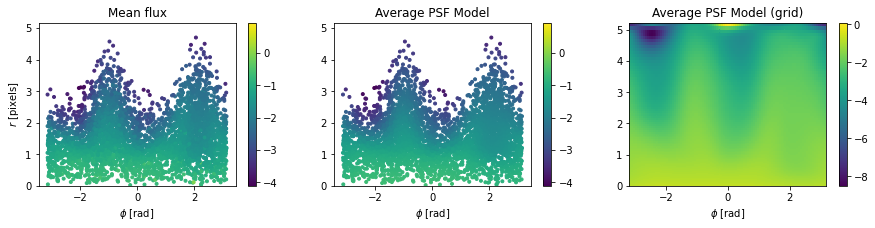

In [7]:
c._build_psf_model();

(4097, 59) (59,)


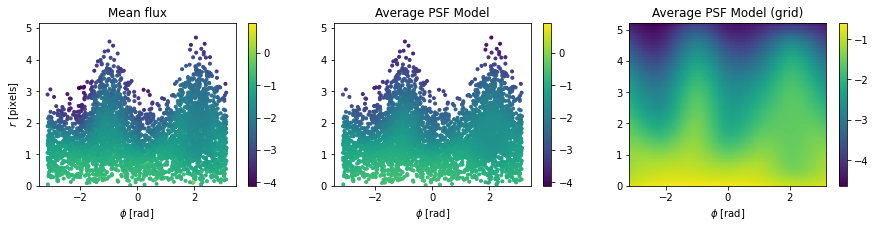

In [23]:
c._build_psf_model(load=True);

In [24]:
c.contamination_metrics()

(4097, 59) (59,)


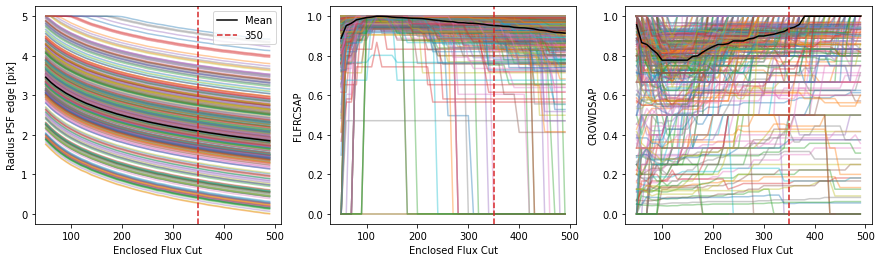

In [37]:
c.optimize_aperture()

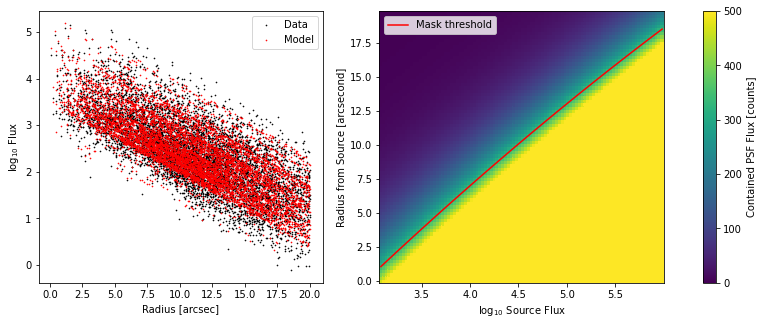

In [38]:
c.find_aperture(space="pix-auto", cut=c.optim_cut, plot=True)

1 1.873481248016824


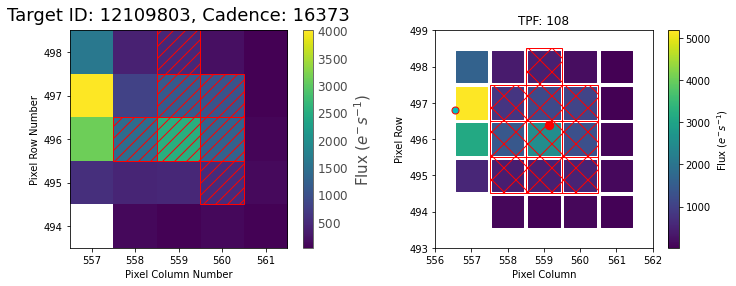

11 1.993765502084499


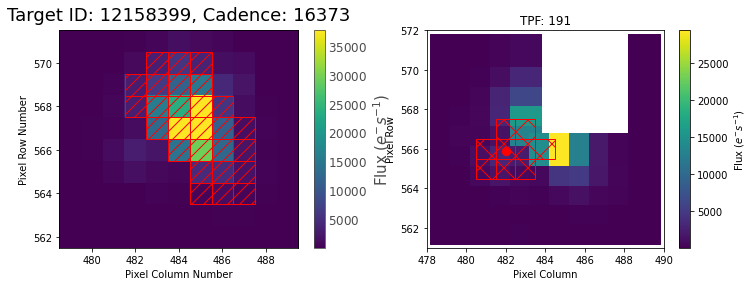

21 2.4331893355272367


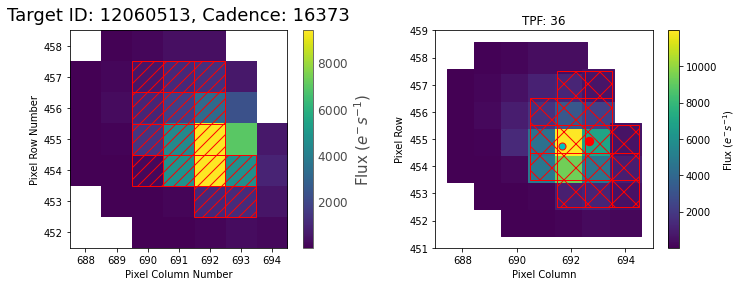

31 2.18689921227417


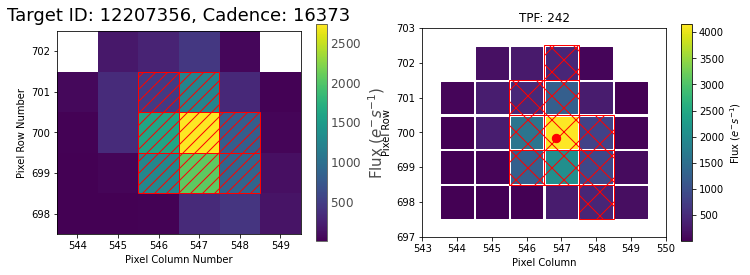

41 3.003085217234638


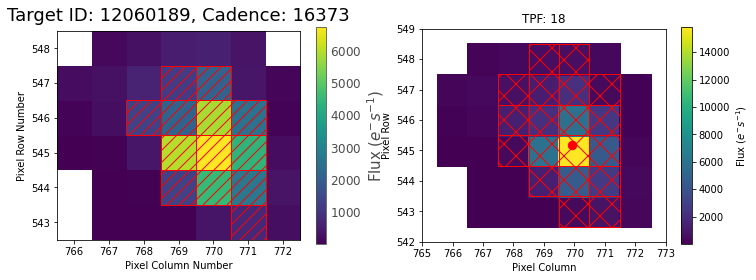

51 1.8158005815990146


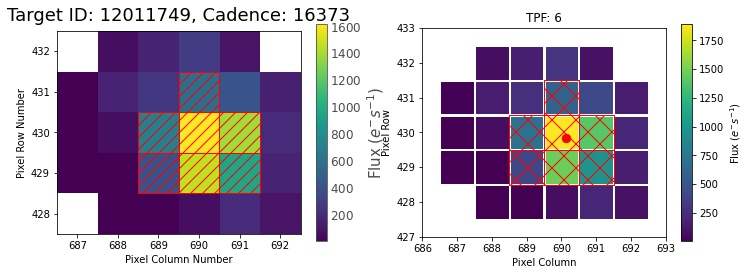

61 2.1224903827216544


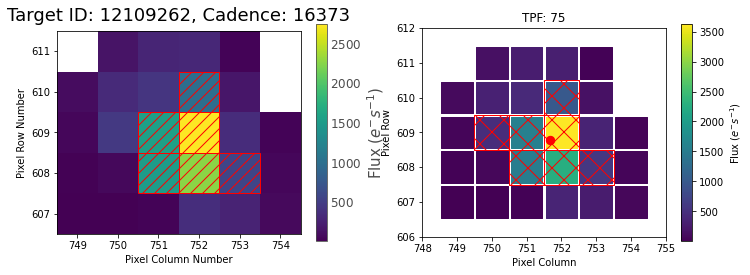

71 1.8077917383873379


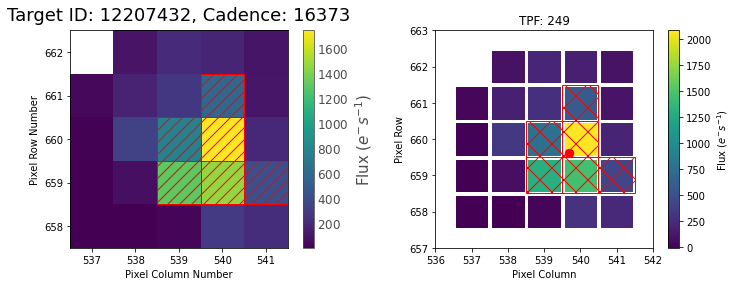

81 2.92131834645215


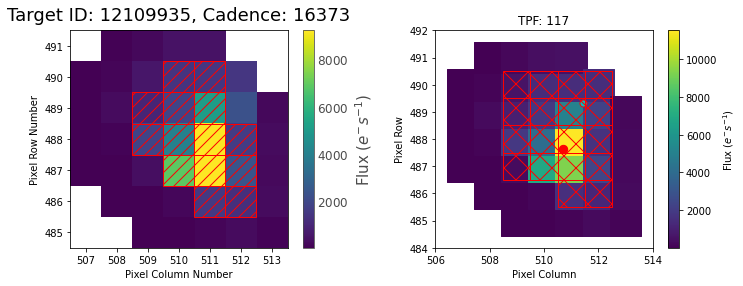

91 1.9499656016909075


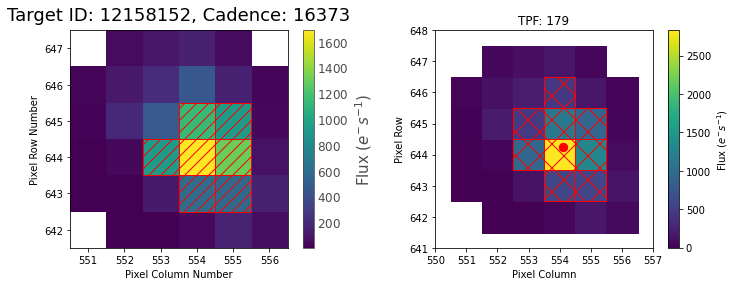

101 2.519826826566101


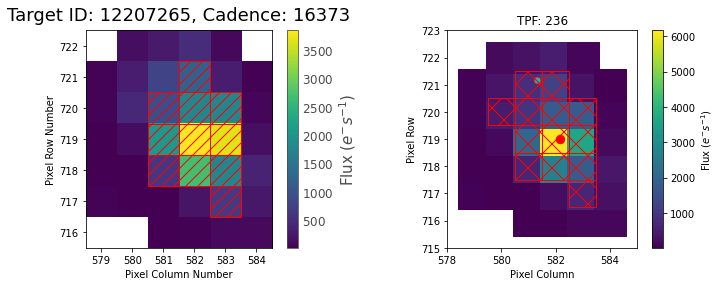

111 1.9040801510053162


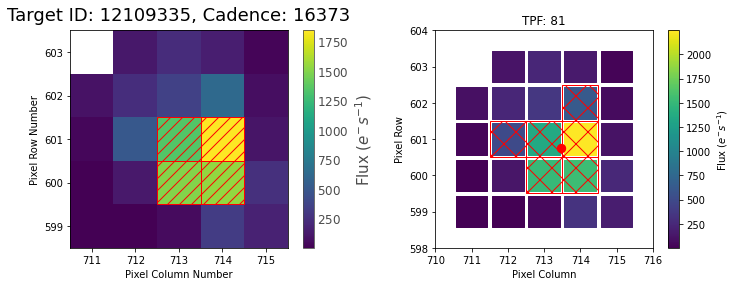

121 2.08637437326541


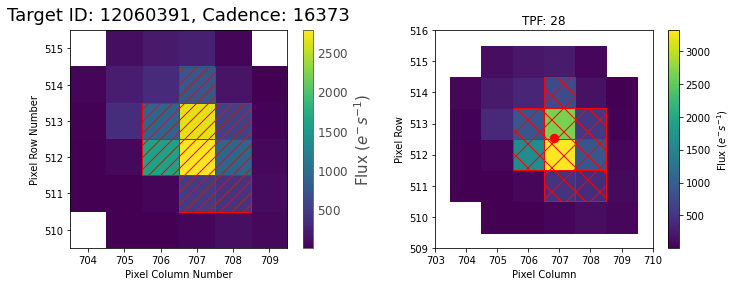

131 1.5709225030175045


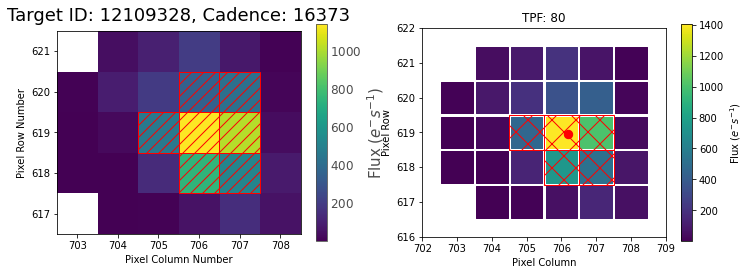

141 0.39069949678582905


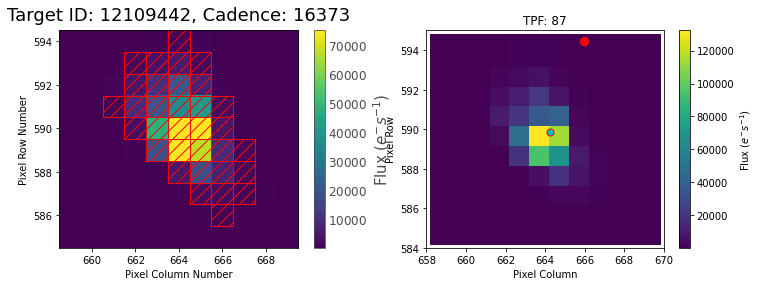

151 1.4479044215243766


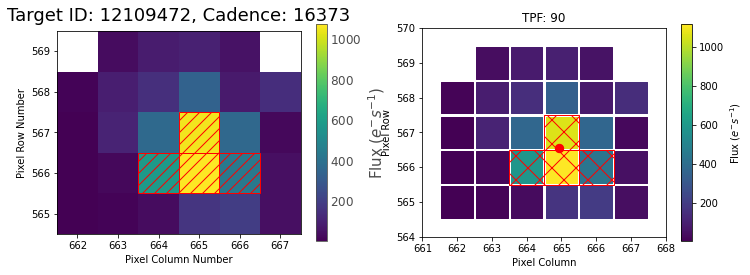

161 2.205074830388039


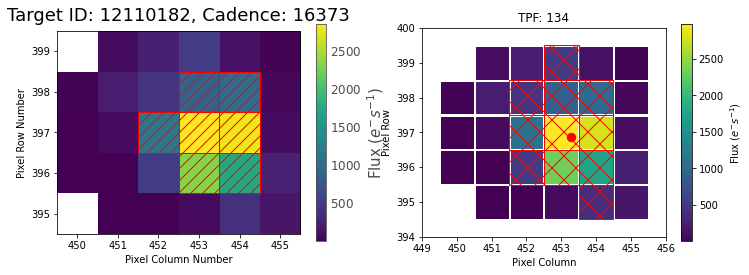

171 2.7807444593502098


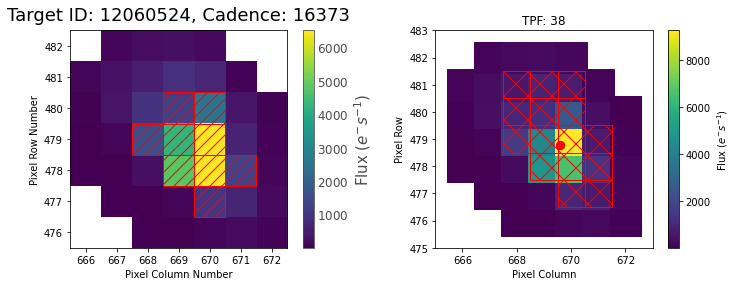

181 2.4066518499191387


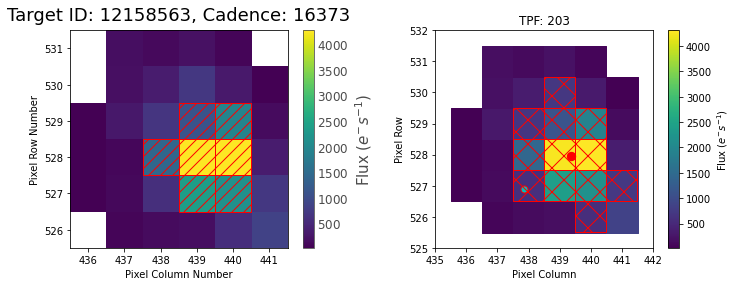

191 1.7794352062075935


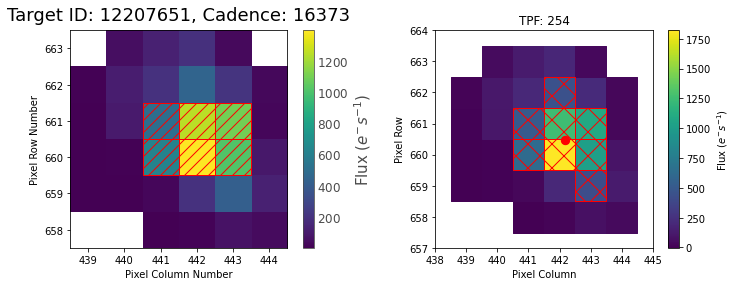

201 3.7808087447588417


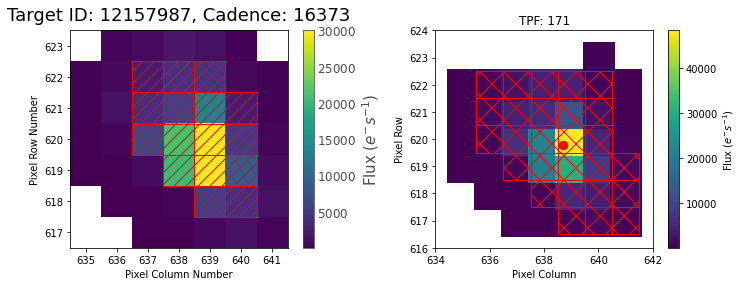

211 2.3213947794107233


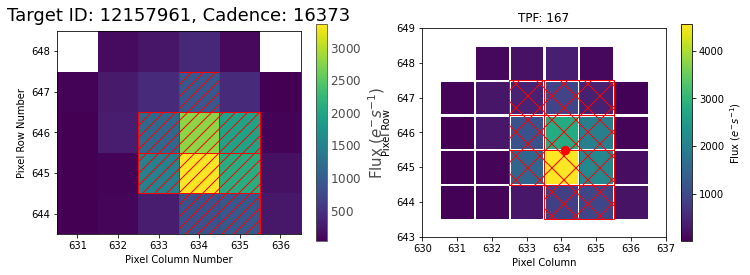

221 2.695953766968694


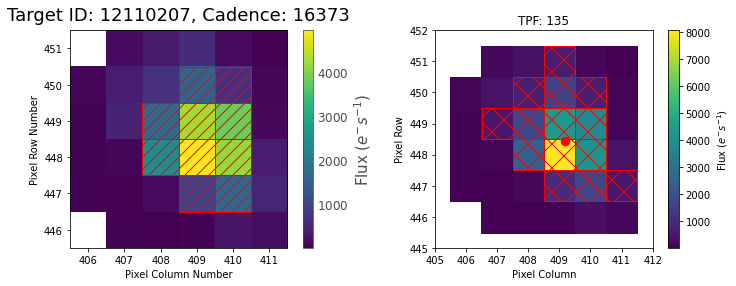

231 1.9476195099582974


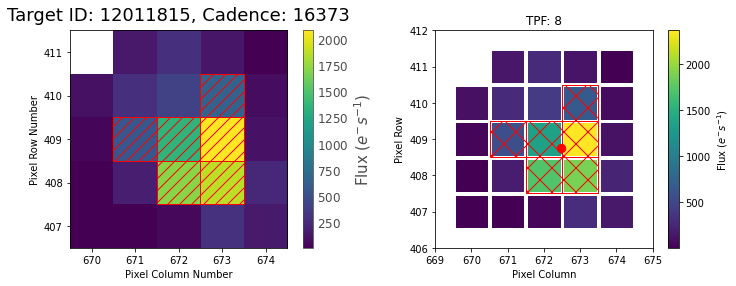

241 2.918175039145275


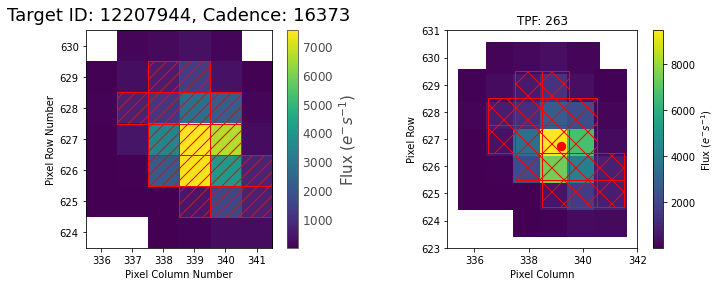

251 0.15639232673267855


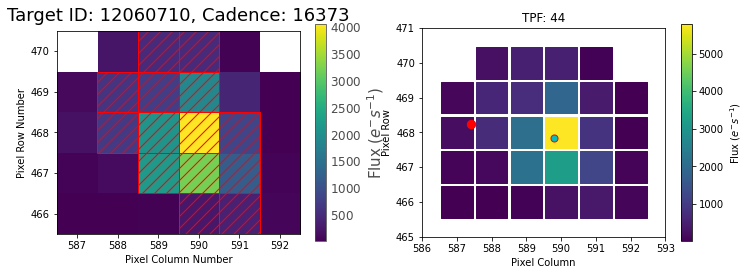

261 1.5130062165067093


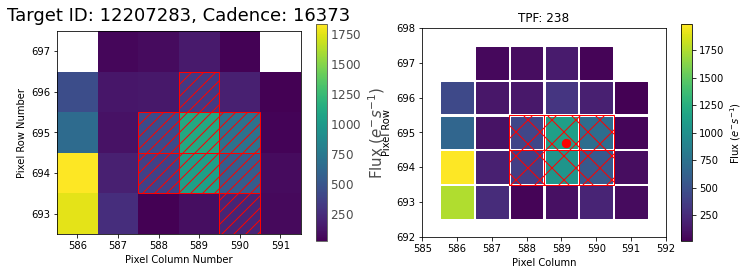

271 3.114999729572105


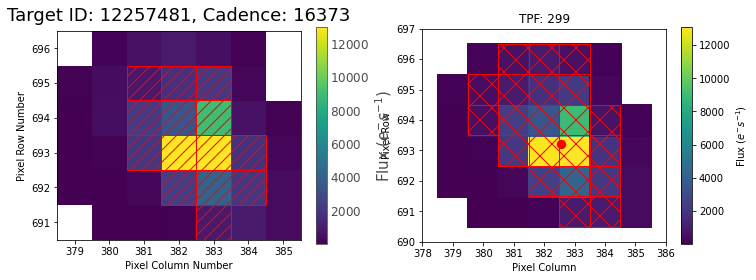

281 2.468600649832389


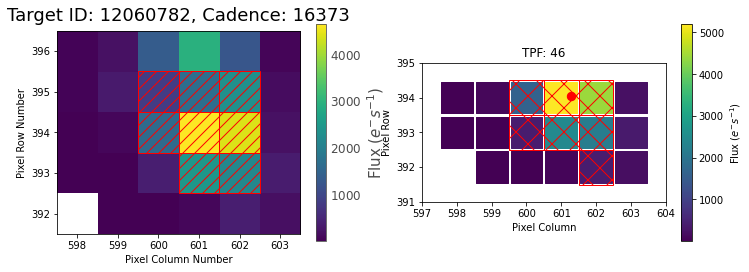

291 3.0706366022877862


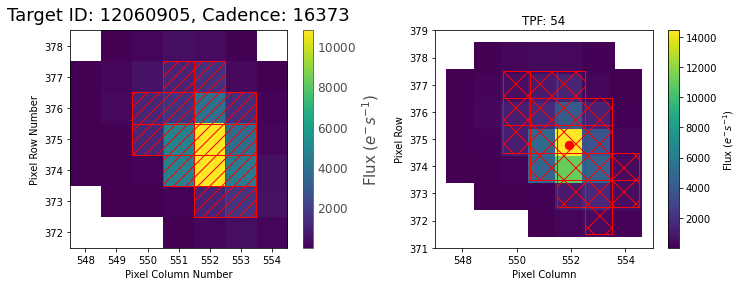

301 1.6704514867846685


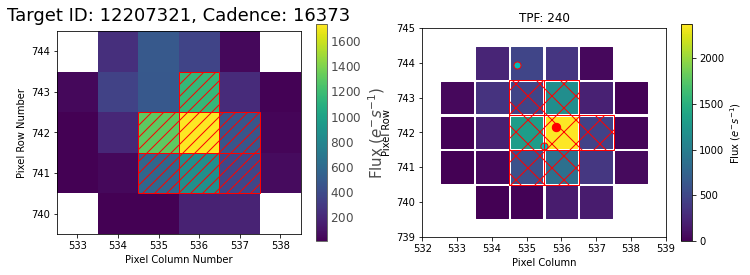

311 1.4433433088625733


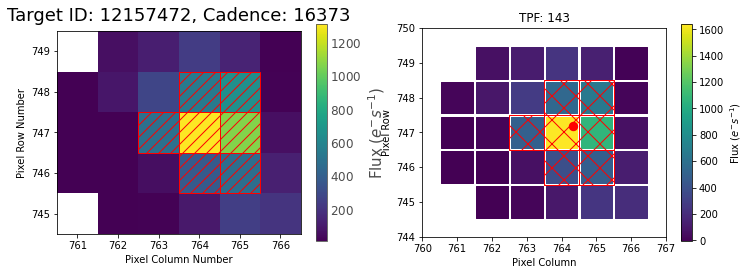

321 2.7976440793410333


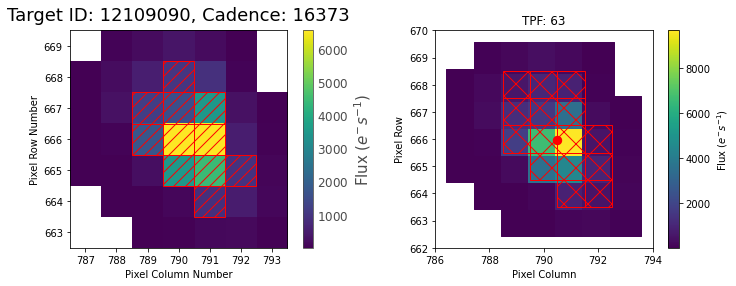

331 1.431139503549403


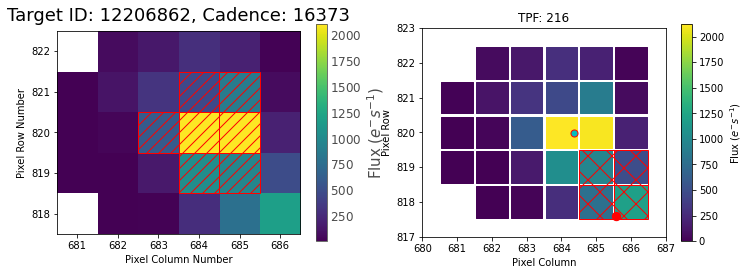

341 1.467324209783647


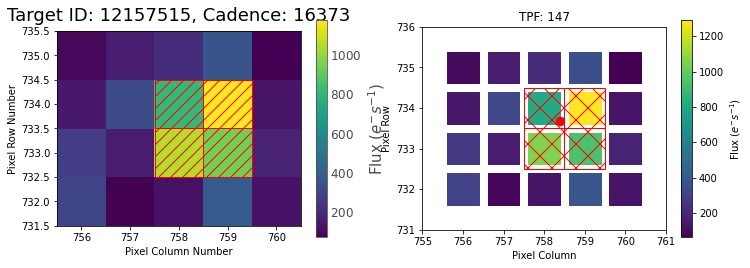

351 3.9322737887932515


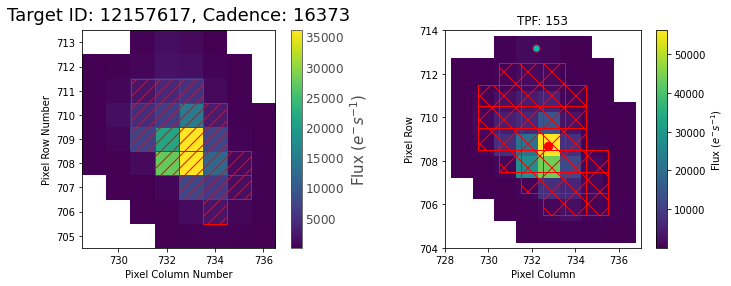

361 0.377836279585396


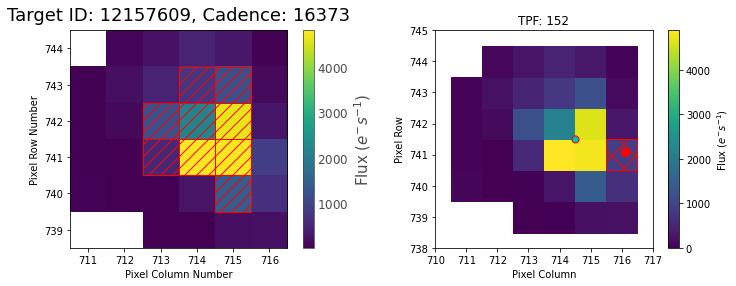

371 2.904170169045562


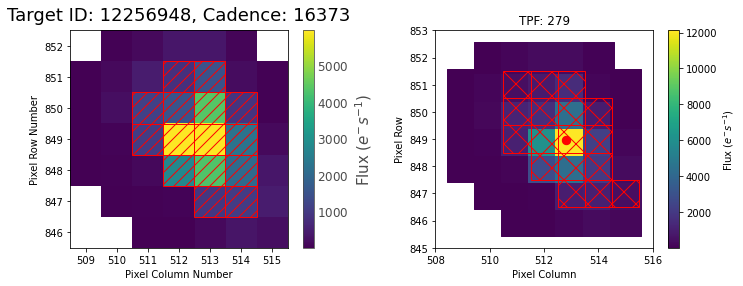

In [39]:
for s in range(1, len(c.sources), 10):
    print(s, radius[s])
    fig, ax = plt.subplots(1,2, figsize=(12,4))
    tpfs[c.sources.loc[s, "tpf"]].plot(aperture_mask='pipeline', ax=ax[0]);
    c.plot_source(s, ax=ax[1]);
    plt.show()

In [10]:
tpf = lk.search_targetpixelfile('KIC 6922244', author="Kepler", cadence="long", quarter=4).download()
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)

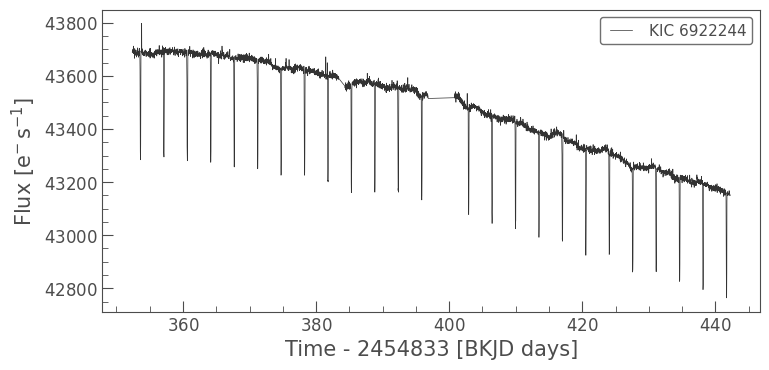

In [4]:
lc.plot();

In [12]:
lcf = lk.search_lightcurve('KIC 6922244', author="Kepler", cadence="long", quarter=4).download()

In [17]:
lcf

time,flux,flux_err,quality,timecorr,centroid_col,centroid_row,cadenceno,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,sap_quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,,d,pix,pix,,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
object,float32,float32,int32,float32,float64,float64,int32,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
352.37632485035283,nan,nan,0,-1.410670e-03,682.69125,190.13296,11914,4.3689148e+04,6.6459765e+00,1.6722699e+03,4.6767941e-01,nan,nan,0,682.60927,7.8001787e-05,190.36814,1.1752916e-04,682.69125,1.8638317e-04,190.13296,1.8306405e-04,9.8764673e-02,-1.7217098e-01
352.3967580484896,5.2490750e+04,8.0003128e+00,10000000000000,-1.411072e-03,682.69084,190.13270,11915,4.3698070e+04,6.6462421e+00,1.6698400e+03,4.6764868e-01,5.2490750e+04,8.0003128e+00,10000000000000,682.60900,7.7997785e-05,190.36777,1.1751152e-04,682.69084,1.8633612e-04,190.13270,1.8303936e-04,9.8700106e-02,-1.7229939e-01
352.4376244455707,5.2484055e+04,7.9999790e+00,10000,-1.411874e-03,682.69038,190.13302,11917,4.3694105e+04,6.6461620e+00,1.6731306e+03,4.6705514e-01,5.2484055e+04,7.9999790e+00,10000,682.60862,7.7994831e-05,190.36848,1.1754913e-04,682.69038,1.8634219e-04,190.13302,1.8301954e-04,9.8306537e-02,-1.7180158e-01
352.45805764463876,5.2491809e+04,8.0006199e+00,0,-1.412275e-03,682.69084,190.13257,11918,4.3698316e+04,6.6463132e+00,1.6741406e+03,4.6687824e-01,5.2491809e+04,8.0006199e+00,0,682.60872,7.7998680e-05,190.36792,1.1751390e-04,682.69084,1.8635279e-04,190.13257,1.8304381e-04,9.8410256e-02,-1.7202987e-01
352.4784908439324,5.2478277e+04,7.9992733e+00,0,-1.412676e-03,682.68949,190.13304,11919,4.3687648e+04,6.6459165e+00,1.6723815e+03,4.6764576e-01,5.2478277e+04,7.9992733e+00,0,682.60829,7.7993544e-05,190.36814,1.1756293e-04,682.68949,1.8641398e-04,190.13304,1.8308057e-04,9.8039381e-02,-1.7183834e-01
352.4989240434661,5.2475855e+04,7.9986620e+00,0,-1.413077e-03,682.69036,190.13318,11920,4.3686480e+04,6.6458707e+00,1.6734375e+03,4.6817183e-01,5.2475855e+04,7.9986620e+00,0,682.60852,7.7998702e-05,190.36875,1.1761812e-04,682.69036,1.8637831e-04,190.13318,1.8304847e-04,9.8102726e-02,-1.7151666e-01
352.5193572433491,5.2487070e+04,7.9990516e+00,0,-1.413477e-03,682.69073,190.13307,11921,4.3692590e+04,6.6460714e+00,1.6731461e+03,4.6760359e-01,5.2487070e+04,7.9990516e+00,0,682.60880,7.8005593e-05,190.36825,1.1757523e-04,682.69073,1.8636670e-04,190.13307,1.8304495e-04,9.8343305e-02,-1.7184900e-01
352.53979034345684,5.2507734e+04,8.0051088e+00,10000000,-1.413877e-03,682.68909,190.13338,11922,4.3712012e+04,6.6500912e+00,1.6725844e+03,4.6755314e-01,5.2507734e+04,8.0051088e+00,10000000,682.60829,7.7979123e-05,190.36859,1.1755893e-04,682.68909,1.8644832e-04,190.13338,1.8299681e-04,9.8101854e-02,-1.7161448e-01


<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='sap_flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

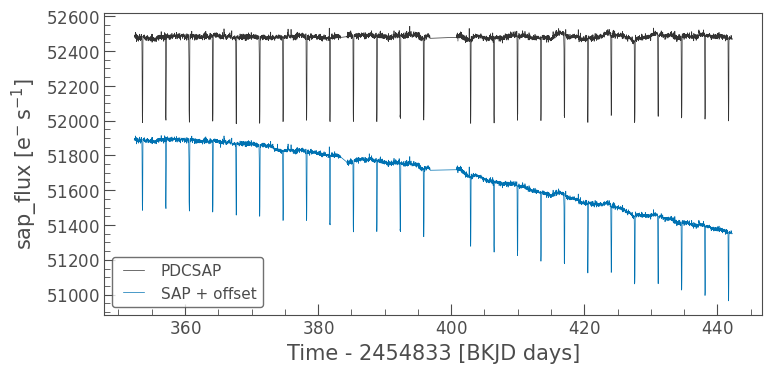

In [27]:
ax = lcf.plot(column="pdcsap_flux",label="PDCSAP")
lcf.plot(ax=ax, column="sap_flux", label="SAP + offset", offset=8200)